# **Lab 3: Approximation**
**Mirja Johnsson**

# **Abstract**

In lab 3 for *Methods in Scientific Computation* 3 an approximation method to approximate functions of one variable was implemented.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 



[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



In [2]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

# **Introduction**
In this lab there is only one mandatory assignment - L2 projection to piece-wise linear approximation over a mesh in 1D. 

# **Method**
The task of performing L2 Projection to piece-wise linear approximation over a  mesh in 1D has quite a few steps.
I have used formulas from example 9.8, and algorithm 9.2 specified in chapters 9 of the course-book to do this. I alse made use of the scipy library for integration, and numpy as usual. 

Step 1: Assemble system, based on algorithm 9.2

Step 2: Integrating matrix $(\phi_i, \phi_j)$. Using equation 9.17 and example 9.8 in chapter 9 as basis for this function.

Step 3: Integrating vector, made use of the scipy library for $f(x) * \phi_i(x)$

Step 4: Solve $A\alpha = b$ for $\alpha$ to complete the projection

In [44]:
#3.1  

#Input: function f(x), 1D mesh with nodes (x0,...,xn)
#Output: vector of L2 projection of f(x) evaluated in (x0,...,xn) 
#Test: verify accuracy and convergence rate against exact function

#algorithm 9.2
def assemble_system(f, mesh):
  n = len(mesh)
  b = np.zeros(n)
  A = np.zeros((n, n))
  for k in range(n - 1):
    q = 2#get_no_local_shape_functions(k, n) not needed now
    b_l = np.zeros(q)
    A_l = np.zeros((q,q))
    for i in range(q):
      b_l[i] = integrate_vector(f, k, i, mesh)
      for j in range(q):
        A_l[i][j] = integrate_matrix(k, i, j, mesh)
    b[k:k+q] += b_l
    A[k:k+q, k:k+q] += A_l
  return A, b  

def integrate_vector(f, k, i, mesh):
  h = mesh[k+i] - mesh[k-i+1]
  return integrate.quad(lambda x: f(x)*(x - mesh[k-i+1])/h, mesh[k], mesh[k+1])[0]

def integrate_matrix(k, i, j, mesh):
  h = 0
  if k == 0:
    h = mesh[k + 1] - mesh[k]
  else:
    h = mesh[k] - mesh[k - 1]
  if i == j:
    return h/3
  elif np.abs(i-j) == 1:
    return h/6  
 


def l2_proj(f, mesh):
  A, b = assemble_system(f, mesh)
  return np.linalg.solve(A, b)    

# **Results**
To test that the function approximation works as intended I formulated a simple x^2 function f(x). I test it with a gradually increasing number of grid-points in the mesh and plot this against the function to compare values. Since the shape of the function was so smooth I was not satisfied with the testing, and also added the cosine function to the tests. Those plots are a lot more interesting because you can see how the general shape is correct even when the resolution is only 5 points, and how the approximation gets smoother and smoother when the resolution is increased. 

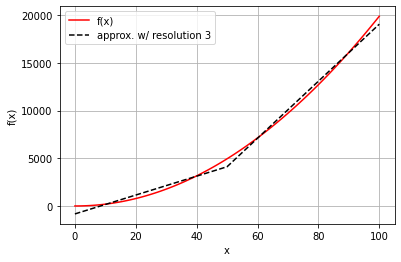

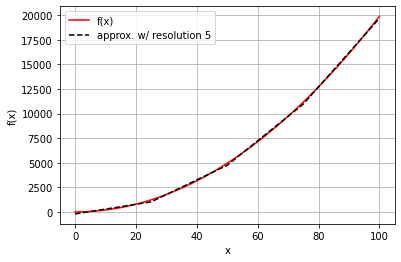

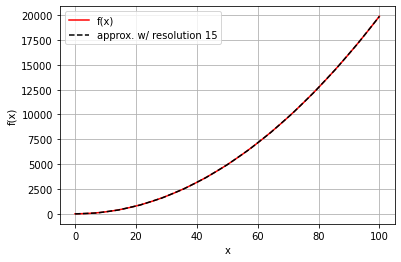

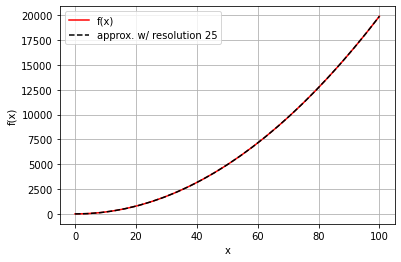

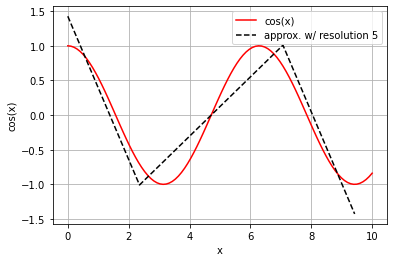

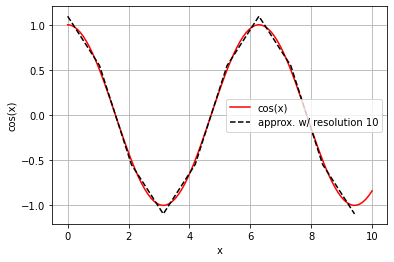

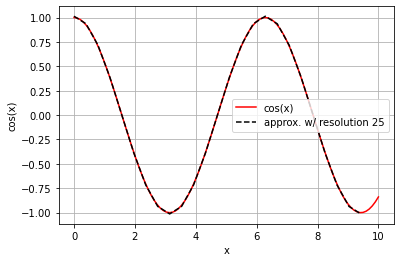

In [43]:
x = np.linspace(0,100,100)


def f(x):
  return 2*x**2 -x

def cos(x):
  return np.cos(x)

for res in [3, 5, 15, 25]:
  mesh = np.linspace(0, 100, res)
  alpha = l2_proj(f, mesh)
  plt.plot(x, f(x), color = 'red', label = "f(x)")
  plt.plot(mesh, alpha, '--', color = "black", label = f"approx. w/ resolution {res}")
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.grid()
  plt.legend()
  plt.show()

x = np.linspace(0,10,100)
for res in [5, 10, 25]:
  mesh = np.linspace(0, np.pi*3, res)
  alpha = l2_proj(cos, mesh)
  plt.plot(x, cos(x), color = 'red', label = "cos(x)")
  plt.plot(mesh, alpha, '--', color = "black", label = f"approx. w/ resolution {res}")
  plt.xlabel("x")
  plt.ylabel("cos(x)")
  plt.grid()
  plt.legend()
  plt.show()  


# **Discussion**

As we can see from the plots the results are close to the actual solution even with a low resolution in the mesh. The implementation was tricky, especially understanding what the assignment actually was, and then finding the correct material to use in the book. If this wasn't a late submission I would have liked to do more of the implementation with my own code instead of using computational libraries.